In [5]:
#!pip install --upgrade --no-cache-dir gdown

In [6]:
#!gdown https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP

In [7]:
#!unzip MaskDatasets.zip

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
import os

data_root = '/content/MaskDatasets'
data_root

'/content/MaskDatasets'

In [36]:
test_dir = os.path.join(data_root, 'Test')
train_dir = os.path.join(data_root, 'Train')
val_dir = os.path.join(data_root, 'Validation')

In [37]:
# 파일명 리스트 구하기

train_mask_fname = os.listdir(os.path.join(train_dir, 'Mask'))
train_nomask_fname = os.listdir(os.path.join(train_dir, 'NoMask'))

print('Mask:', len(train_mask_fname))
print('NoMask:', len(train_nomask_fname))

Mask: 300
NoMask: 300


In [38]:
class_name = ['mask', 'nomask']

In [39]:
import PIL

X_train = []
y_train = []

for i in range(len(train_mask_fname)):
    f = os.path.join(train_dir, 'Mask', train_mask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

In [40]:
for i in range(len(train_nomask_fname)):
    f = os.path.join(train_dir, 'NoMask', train_nomask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1) 

In [41]:
# 검증 데이터

val_mask_fname = os.listdir(os.path.join(val_dir, 'Mask'))
val_nomask_fname = os.listdir(os.path.join(val_dir, 'NoMask'))

print('Mask:', len(val_mask_fname))
print('NoMask:', len(val_nomask_fname))

Mask: 153
NoMask: 153


In [42]:
import PIL

X_val = []
y_val = []

for i in range(len(val_mask_fname)):
    f = os.path.join(val_dir, 'Mask', val_mask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_val.append(arr)
    y_val.append(0) 

In [43]:
for i in range(len(val_nomask_fname)):
    f = os.path.join(val_dir, 'NoMask', val_nomask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_val.append(arr)
    y_val.append(1)

In [44]:
# 데스트 데이터

test_mask_fname = os.listdir(os.path.join(test_dir, 'Mask'))
test_nomask_fname = os.listdir(os.path.join(test_dir, 'NoMask'))

print('Mask:', len(test_mask_fname))
print('NoMask:', len(test_nomask_fname))

Mask: 50
NoMask: 50


In [45]:
import PIL

X_test = []
y_test = []

for i in range(len(test_mask_fname)):
    f = os.path.join(test_dir, 'Mask', test_mask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(0) 

In [46]:
for i in range(len(test_nomask_fname)):
    f = os.path.join(test_dir, 'NoMask', test_nomask_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(1)

In [47]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(600, 224, 224, 3) (600,)
(306, 224, 224, 3) (306,)
(100, 224, 224, 3) (100,)


In [48]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [49]:
print(X_train.shape, X_val.shape, X_test.shape)

(600, 224, 224, 3) (306, 224, 224, 3) (100, 224, 224, 3)


In [50]:
y_train.shape

(600,)

In [51]:
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),                                                 
    layers.MaxPooling2D(2),
    layers.Dropout(0.5),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2), 
    layers.Dropout(0.5),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2), 
    layers.Dropout(0.5),

    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(2), 
    layers.Dropout(0.5),

    layers.Flatten(), 

    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')                                           
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [53]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val),
                verbose=1)

Epoch 1/30
19/19 [==============================] - 12s 145ms/step - loss: 1.1168 - acc: 0.4817 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/30
19/19 [==============================] - 2s 83ms/step - loss: 0.6911 - acc: 0.5317 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/30
19/19 [==============================] - 2s 84ms/step - loss: 0.6898 - acc: 0.5033 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/30
19/19 [==============================] - 2s 82ms/step - loss: 0.6559 - acc: 0.6267 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 5/30
19/19 [==============================] - 2s 82ms/step - loss: 0.4018 - acc: 0.8533 - val_loss: 0.7157 - val_acc: 0.5000
Epoch 6/30
19/19 [==============================] - 2s 84ms/step - loss: 0.2441 - acc: 0.9150 - val_loss: 0.6460 - val_acc: 0.5523
Epoch 7/30
19/19 [==============================] - 2s 83ms/step - loss: 0.2784 - acc: 0.8917 - val_loss: 0.5047 - val_acc: 0.7680
Epoch 8/30
19/19 [==============================] - 2s 84ms/step - loss: 0.2299 -

In [54]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

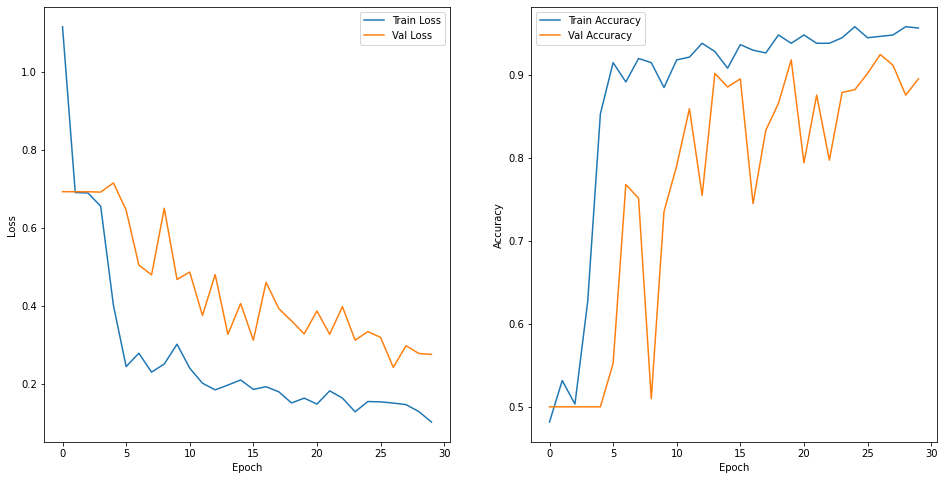

In [56]:
plot_history(log)

In [57]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 84ms/step - loss: 0.2464 - acc: 0.9000


[0.24639390408992767, 0.8999999761581421]

In [58]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred

4/4 [==============================] - 0s 30ms/step


array([1.3285345e-02, 1.8285893e-02, 3.9105016e-01, 2.9806179e-01,
       1.9861324e-02, 1.9903965e-02, 8.4022753e-02, 2.7986199e-03,
       5.4836425e-04, 8.6687375e-03, 2.7172875e-02, 4.5882723e-01,
       8.6473882e-02, 7.5033225e-02, 1.8279243e-04, 5.2837227e-02,
       2.2505355e-01, 2.2174856e-03, 4.8413165e-03, 2.3839038e-02,
       3.8528314e-01, 4.5997154e-02, 7.1967036e-02, 2.0598020e-01,
       3.4302598e-01, 5.2360956e-02, 2.7340451e-02, 1.4965083e-02,
       3.0117163e-03, 4.6081930e-02, 1.4111996e-01, 9.3270496e-02,
       2.0932309e-01, 9.1916777e-02, 3.7733156e-03, 4.2568922e-01,
       1.4478195e-01, 1.0403041e-02, 2.0702571e-01, 2.8477145e-02,
       6.2559254e-02, 1.5206076e-03, 9.7624123e-02, 7.1137594e-03,
       4.3241493e-02, 3.6429830e-02, 3.9977187e-01, 2.6624916e-02,
       5.3615712e-02, 9.2014477e-02, 8.6950785e-01, 3.8069519e-01,
       6.8634939e-01, 6.9075829e-01, 2.3751958e-01, 7.3834985e-01,
       5.9957534e-01, 9.5976573e-01, 9.9173427e-01, 4.2399985e

In [59]:
y_pred = (y_pred > 0.5).astype(int)                                #y_pred > 0.5 기준 [1,0]으로 변경
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [60]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

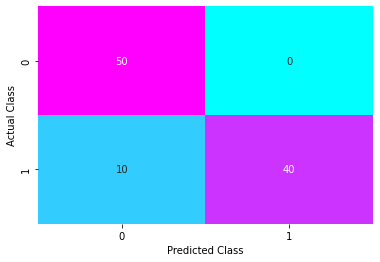

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='cool', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [73]:
samples = np.where((y_test != y_pred))[0]                    #samples = np.where((y_test == y_pred) == False)[0]
samples

array([51, 54, 59, 61, 80, 85, 93, 94, 95, 98])

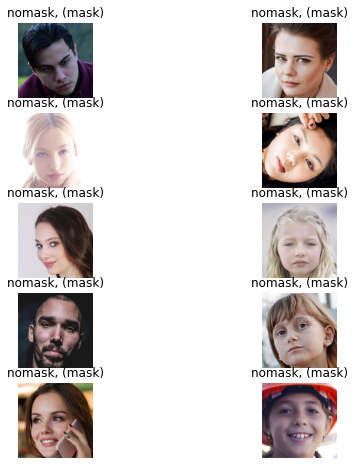

In [77]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(5, 2, i+1)
  plt.imshow(X_test[idx], cmap='gray')                          
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()